In [30]:
import pandas as pd
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import numpy as np

In [84]:
sigmam = 0.001
m0 = 8.310
M = 25.089
msh = (M - m0) / 20
sigmash = sigmam / 20
L = 11.6
D = L / 20
sigmaD = 0.05 / 20
rmax = 1.6
sigmarmax = 0.05
D

0.58

In [32]:
Pm = rmax**2 * np.sqrt(msh*981/6)
sigmaPm = Pm * np.sqrt((sigmash/msh)**2)
print(f'Магнитный момент шарика равна: {Pm} ± {np.round(sigmaPm, 3)}')

Магнитный момент шарика равна: 29.982433769125553 ± 0.002


In [33]:
pm = Pm / (math.pi * (D/2)**3 * 4 / 3)
sigmapm = pm * np.sqrt((sigmaD/D)**2 + (sigmaPm/Pm)**2)
print(f'Намагниченность материала шарика равна: {pm} ± {np.round(sigmapm,0)}')

Намагниченность материала шарика равна: 293.48389890616875 ± 1.0


In [34]:
Bp = (8*math.pi/3) * pm
sigmaBp = Bp * (sigmapm/pm)
print(f'Магнитное поле на полюсах шариков: {Bp} ± {np.round(sigmaBp)}')

Магнитное поле на полюсах шариков: 2458.6849620013577 ± 11.0


In [35]:
Br = 1.5 * Bp
sigmaBr = Br * sigmaBp/Bp
print(f'Остаточная магнитная индукция: {Br} ± {np.round(sigmaBr)}')

Остаточная магнитная индукция: 3688.0274430020363 ± 16.0


In [36]:
N = [i for i in range (11, 3, -1)]
print(N)
n = 10
sigmaT = 0.001
T = np.array([44.25, 39.02, 35.38, 31.20, 27.95, 24.06, 20.62, 16.53])
T = T / 10

[11, 10, 9, 8, 7, 6, 5, 4]


In [40]:
def line(x, a):
    return a*x
params, cov = curve_fit(line, N, T)
params, cov

(array([0.39719512]), array([[6.77011272e-06]]))

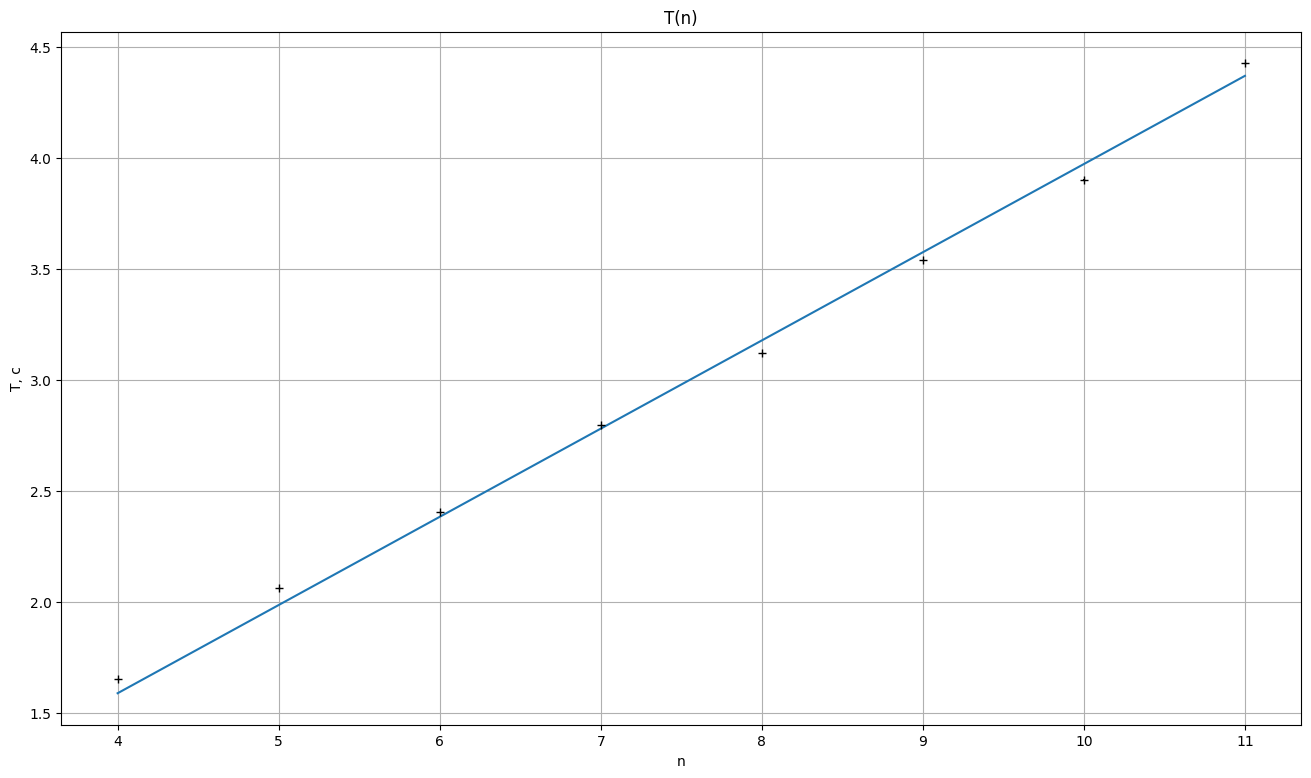

In [45]:
fig, ax = plt.subplots(figsize = (16,9))
x = [4, 11]
y = [params[0]*i for i in x]
plt.plot(x, y)
plt.errorbar(N, T, yerr = sigmaT, fmt = '+', c = 'black')
plt.title('T(n)')
plt.xlabel('n')
plt.ylabel('T, c')
plt.grid()
plt.show()

In [56]:
Bh = math.pi**2 * msh* D**2 / (3 * params[0]**2 * Pm)
sigmaBh = Bh * ((sigmash/msh)**2 + (cov[0]**(1/2) / params[0])**2 + (sigmaPm / Pm)**2 + (sigmaD / D)**2)**(1/2)
print(f'Горизонтальная составляющая магнитного поля Земли равна: {np.round(Bh/10000, 5)} ± {np.round(sigmaBh/10000, 7)}')

Горизонтальная составляющая магнитного поля Земли равна: 2e-05 ± [2.e-07]


In [59]:
m  = [0.171, 0.128, 0.076]
N = [8, 6, 4]
sigmam = 0.001
M = []
for i in range (3):
    M.append(m[i] * 981 * ((N[i]/2) - 1) * D)
sigmaM = []
for i in range (3):
    sigmaM.append(M[i] * ((sigmam / m[i])**2 + (sigmaD / D)**2)**(1/2))

[2.120505022667065, 1.299667660288583, 0.5987315529517381]

In [66]:
def linee(x, a):
    return a*x

In [67]:
params, cov = curve_fit(linee, N, M)
params, cov

(array([29.15532]), array([[41.72628891]]))

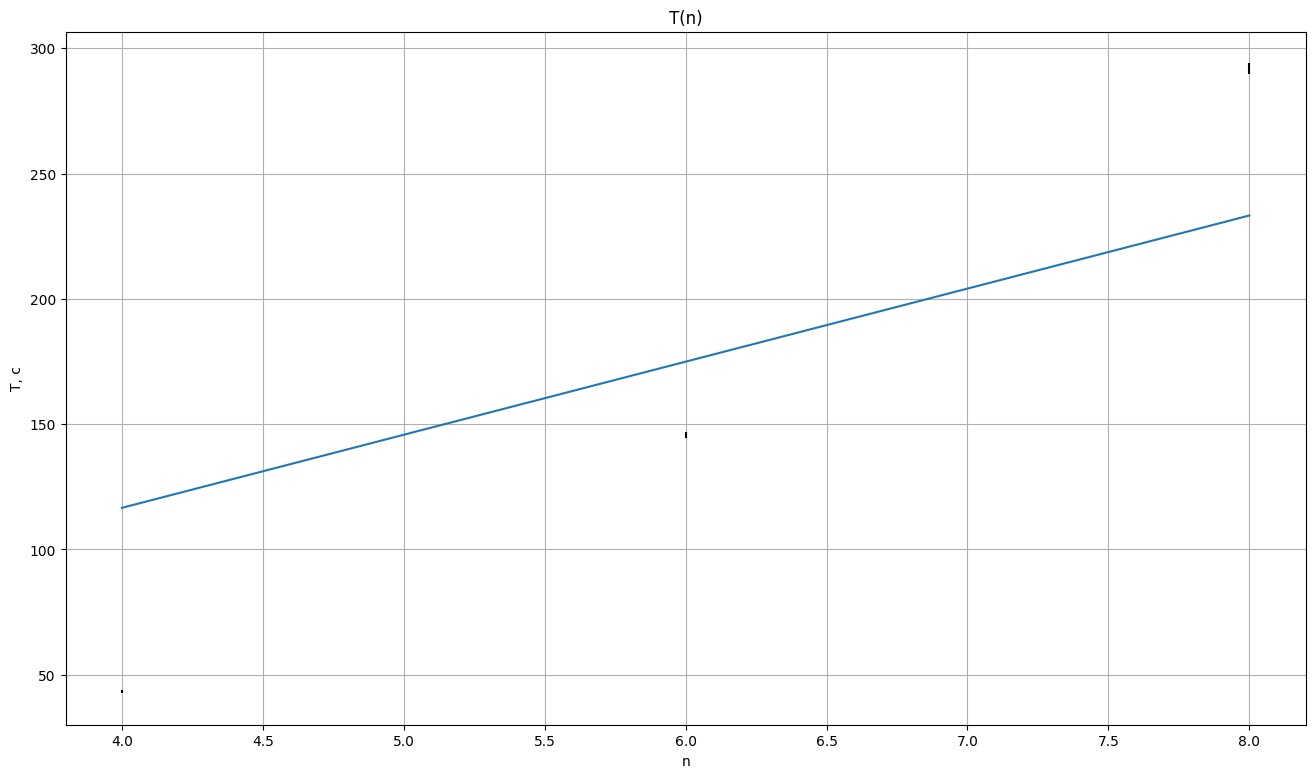

In [69]:
fig, ax = plt.subplots(figsize = (16, 9))
x = [4, 8]
y = [params[0] * i for i in x]
plt.plot(x, y)
plt.errorbar(N, M, yerr = sigmaM, fmt = 'None', c = 'black')
plt.title('T(n)')
plt.xlabel('n')
plt.ylabel('T, c')
plt.grid()
plt.show()

In [76]:
Bv = params[0] / Pm
sigmaBv = Bv * ((sigmaPm / Pm)**2 + (cov[0] / params[0])**2)**(1/2)
print(f'Вертикальная составляющая магнитного поля Земли равна: {np.round(Bv/10000, 5)} Тл')

Вертикальная составляющая магнитного поля Земли равна: 0.0001 Тл


In [81]:
print(f'Величина магнитного поля Земли составила: {np.round((Bh**2 + Bv**2)**(1/2) / 10000, 5)} Тл')

Величина магнитного поля Земли составила: 0.0001 Тл


In [82]:
print(np.arctan(Bv / Bh))

1.3716153305574519
